In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [17]:
#preprocess the data
data=pd.read_csv('Mumbai.csv')
data=data.drop(['Location'],axis=1)
data.head()


,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,4850000,720,1,1,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,4500000,600,1,1,1,1,1,0,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6700000,650,1,1,1,1,1,0,1,1,...,1,0,1,0,0,0,0,0,0,0
3,4500000,650,1,1,1,0,0,1,0,1,...,1,1,1,0,0,0,0,0,1,0
4,5000000,665,1,1,1,0,0,1,0,1,...,1,0,1,0,0,0,0,0,0,0


In [18]:
# Assigning the data to x and y converting to numpy
train_data=data.values
x=train_data[:,1:-1]

# [:, 1:-1]

# : before the comma specifies that you want to include all rows in the array.
# 1:-1 after the comma specifies that you want to include columns starting from index 1 up to, but not including, the last column.

print(x.shape)
# x=np.delete(x,0,axis=1)
# # print(x)
y=train_data[:,0].reshape(x.shape[0],1)
new_row=np.ones((x.shape[0],1))
# now concatenate the new row with the original feature:
x=np.hstack((new_row,x))



(177, 37)


In [19]:
# printing the shape of variables:
print('shape of x is : ',x.shape)
print('shape of y is : ',y.shape)


shape of x is :  (177, 38)
shape of y is :  (177, 1)


In [20]:
# singular matrix
# part1=np.linalg.inv(np.dot(x.T,x))
# part2=np.dot(x.T,y)
# theta=np.dot(part1,part2)
# print('Theta from direct approach: ',theta)


In [21]:
def model(x,y,learning_rate,iteration):
    theta=np.zeros((38,1))
    cost_list=[]
    for _ in range(iteration):
        y_pred=np.dot(x,theta)
        # print('theta: ',theta)
        cost=(1/2)*np.sum(np.square(y_pred-y))
        # if (iteration%10==0):
            # print('Cost: ',cost)
        # print(cost)
        cost_list.append(cost)
        for i in range(x.shape[0]):
            h_theta=np.dot(x[i],theta)
            for j in range(38):
                theta[j]=theta[j]+learning_rate*(y[i]-h_theta)*x[i][j]
    return theta,cost_list



[5937310.65552317]


<function matplotlib.pyplot.show(close=None, block=None)>

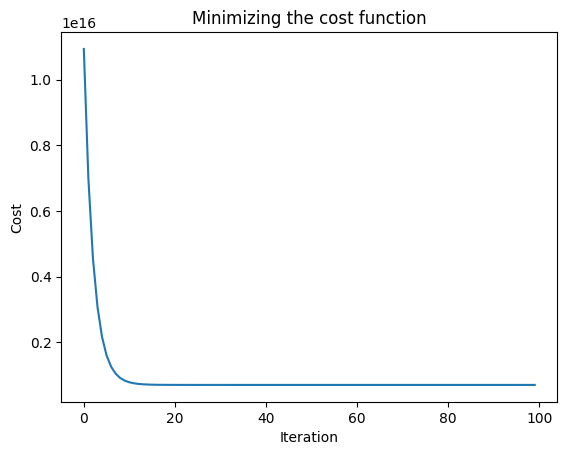

In [22]:
theta,cost=model(x,y,0.000000001,100)
# print('Theta from iterative apporach: ',theta)
test_result=np.dot(x[2],theta)
# cost=cost[::100] #[start:stop:step]
rng=np.arange(0,100)
print(test_result)

plt.plot(rng,cost)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Minimizing the cost function')
plt.show
